<a href="https://colab.research.google.com/github/jimmynewland/colabnotebooks/blob/main/Cepheus_C_SED_Generation_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cepheus C SED Generation Demo

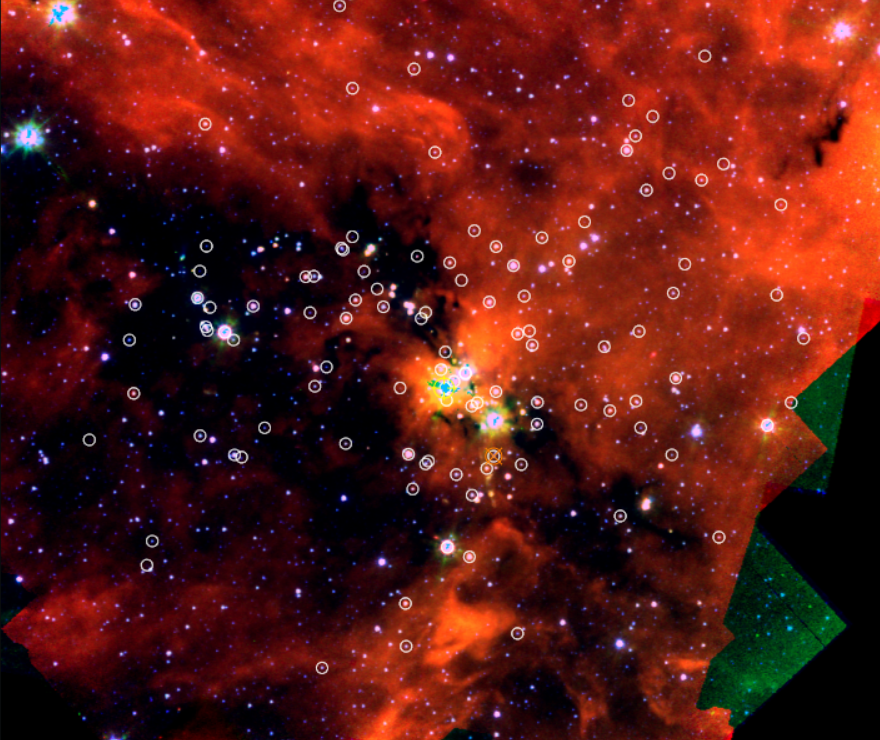

<figcaption>
Using IRSA Viewer, we created an image of Cepheus C using three Spitzer channels. The white circles are the young stellar object candidates which we analyze in this notebook.

Red - IRAC 4

Green - IRAC 3

Blue - IRAC 1
</figcaption>

# **Introduction**

Background information and context of our project.

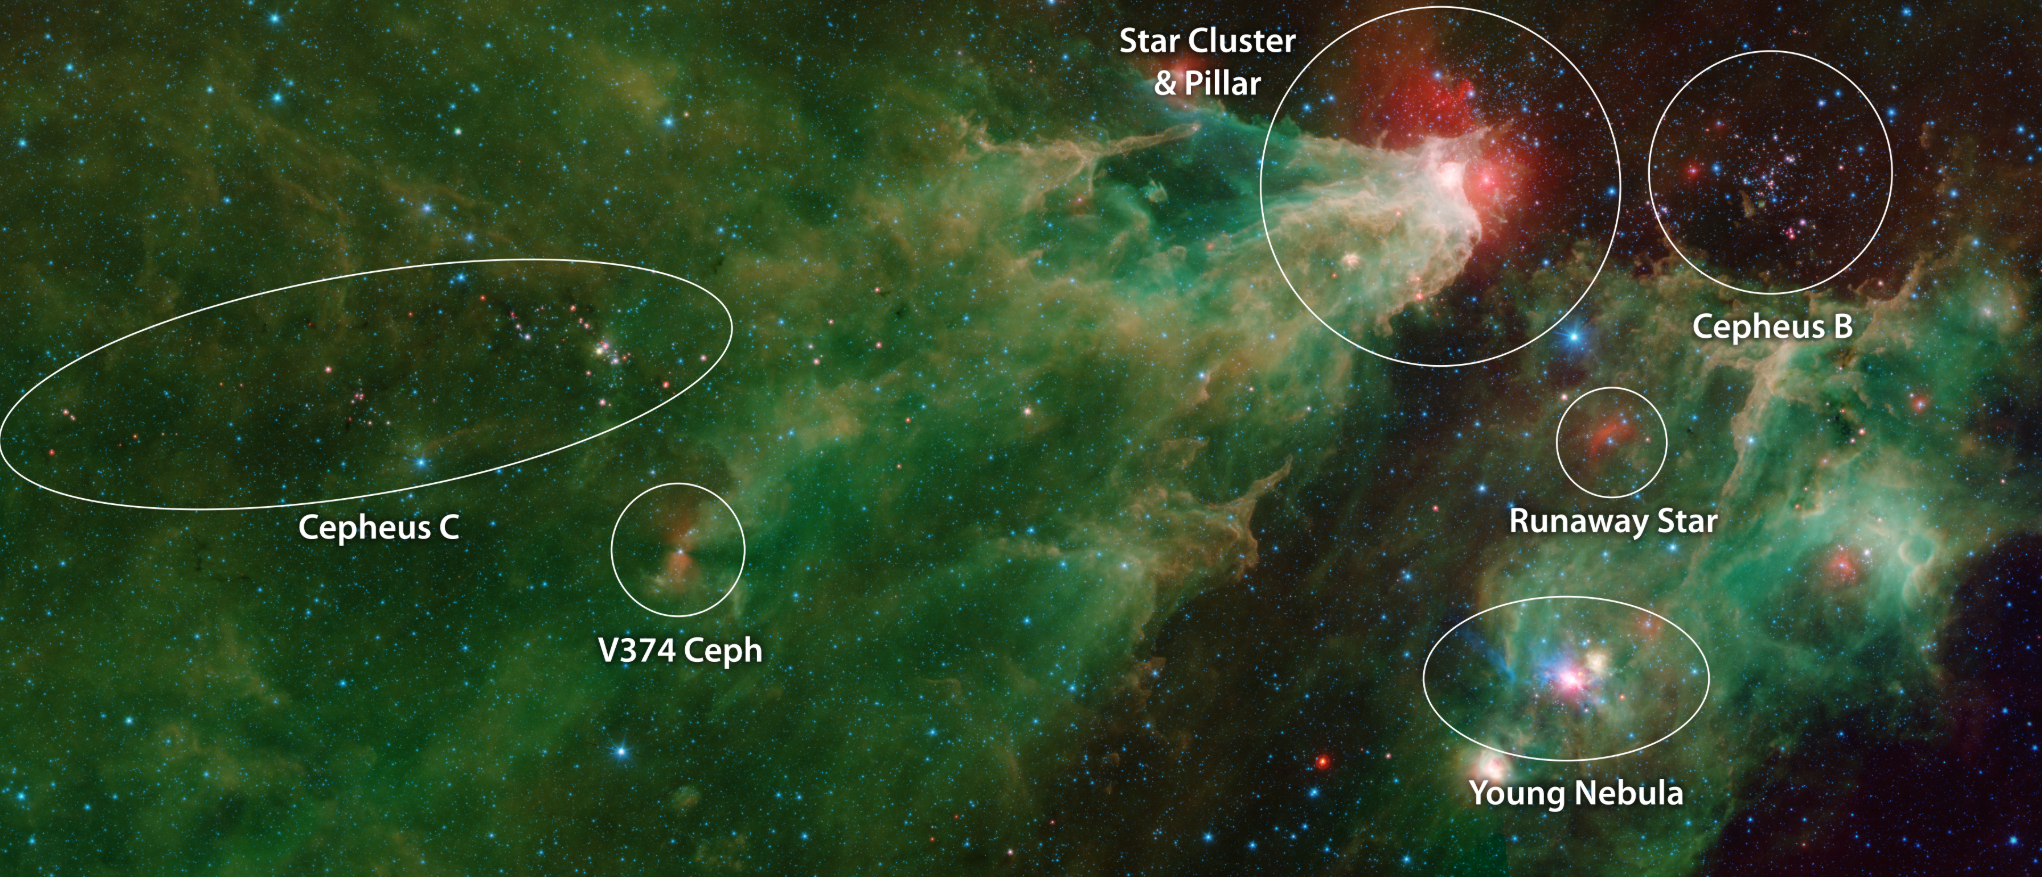

<figcaption>
The image above illustrates how the Cepheus C region fits into the larger Cepheus molecular cloud. Cepheus C has barely been studied in the context of young stellar objects.

*Credit: [NASA/JPL-Caltech](https://photojournal.jpl.nasa.gov/catalog/PIA23126)*</figcaption>

This notebook is written in a [computational essay](https://writings.stephenwolfram.com/2017/11/what-is-a-computational-essay/) format to improve accessibility. By providing a written walk through of the science and the code, we hope to improve your understanding of our research!

Currently, generating spectral energy distributions (SED) from photometric data is not an automated process. Astronomers must spend time creating one SED at a time, which is inefficient for large datasets. Our program is designed to recieve photometric data in the form of a CSV to generate a collection of SEDs which can be easily accessed through Google Drive.

This notebook in particular is intended to showcase our specific work with young stellar object candidates in the Cepheus C molecular cloud. As a result, *this* computational essay will emphasize the astronomical and scientific implications of our work with minimal attention to the implications of our code on other astronomers needing large scale SED production. In addition, we provide a detailed walk through of how our code works so that our findings and process are accessible to everyone, regardless of coding experience.

This project is part of a larger effort to allow high school students to contribute to real-world research by applying computer science and data science techniques to a research project. Our goal is for our code and research to be usable and accessible for other teams working on similar projects requiring SED generation and/or young stellar object classification, regardless of their experience with programming and astronomy research.

This research has made use of the NASA/IPAC Infrared Science Archive, which is funded by the National Aeronautics and Space Administration and operated by the California Institute of Technology

<br><br>
With that out of the way, let's get started!
<br><br>

## Background Science

### Spectral Energy Distributions

What color is the Sun🌞? You might instinctively say yellow, but what do we really mean when we ask what color a star is? The color we associate with a star is its peak wavelength. The sun has a peak wavelength which is roughly "yellow-green." This is also why plant leaves evolved to be green🥬. Although the *peak* wavelength is yellow-green, the Sun also emits light in other wavelengths such as UV (hence why we wear sunscreen) and IR (heat).

We study all kinds of astronomical objects based on their *spectra.* Quasars, galaxies, and stars all emit light at multiple different wavelengths including but not limited to visible, infrared (IR), X-ray, gamma, and ultraviolet (UV). Analyzing the distribution of light as well as the peak wavelength gives us lots of information about an object! For instance, knowing the peak wavelength of a star provides useful information about its color🎨 and temperature🌡.

A spectral energy distribution is simply a graph📈 showing wavelength and intensity. SEDs show the peak wavelength of an object and the range of wavelengths it emits. For the purpose of YSO analysis, we care about the infrared side of the curve, not the peak wavelength. Astronomers in many different fields analyze SEDs to figure out information about an object.

For example, SEDs can be used to identify stars🌟. Stars are an example of a blackbody, which means all energy is absorbed and none is reflected. While stars are not perfect blackbodies, their spectral energy distribution resembles a blackbody curve. While the image below is NOT an SED, it shows what a typical blackbody curve looks like.
<br><br><br>

<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/6a47d55943035469cc43227c4c0c3bdf9c115fc0" alt="blackbody curves" width="800"><br />Blackbody curves for stars of various photosphere effective temperatures ([adapted from OpenStax Astronomy 2e](https://openstax.org/books/astronomy-2e/pages/5-2-the-electromagnetic-spectrum#OSC_Astro_05_02_Illustrate))

### Star Formation & Young Stellar Objects

Gravitational disturbances such as supernovae or the collision of molecular clouds can trigger star formation in a nebula. Gas and dust swirl together to create a spherical mass that releases heat and radiation.

Due to the conservation of angular momentum, this central sphere rotates, dragging the gas and dust around it. As time goes on, the accreting matter flattens into an accretion disk💿.

When the central mass releases light, the surrounding gas and dust acts like a big, warm blanket. If you have ever held a bright flashlight🔦 under a blanket🛌 for a while, you will notice that the blanket feels warm. This is because the blanket has absorbed the light and is re-emitting it as heat, otherwise known as infrared (IR) radiation.

Similarly, as the central mass releases light, the surrounding gas and dust absorbs the light and re-emits it as IR radiation. As the young star develops, the surrounding gas and dust becomes less scattered. It forms a debris disk which may coalesce into planets🪐. The "removal" of the blanket causes the star's light to peak at a higher wavelength such as visible or ultraviolet (UV) rather than infrared.
<br><br><br>


### How They Work Together

SEDs help us classify and learn about YSOs. Since YSOs experience reddening🟥(shifting their wavelengths towards the infrared end of the electromagnetic spectrum), we can analyze the infrared side of an SED to determine what stage of development a YSO is in.

The "infrared side" of a YSO is known as the Rayleigh-Jeans side. More specifically, the Rayleigh-Jeans side of an SED is the side to the right (➡) of the peak wavelength. When a star is just beginning to form, it is still surrounded by a blanket of gas and dust, causing an infrared excess compared to what we would expect to see from a normal blackbody like a star.

This infrared excess causes the slope of the Rayleigh-Jeans side to be higher than it should be; for the stars which are just beginning to develop, they may even have a positive (➕) Rayleigh-Jeans slope.

By analyzing the slope, we can roughly sort a young stellar object between Class I and Class III, with Class I comprising primarily of the youngest🐤 and newest stars while Class III is primarily stars which have a debris disk that is almost fully developed🐔.

The image below shows how the SED looks as the star develops, as well as how the accreting matter changes with time.

<img src="https://thinkingwithcode.com/datascience/yso_classes_from_vallastro.png">
<br />
Adapted from <a href="https://commons.wikimedia.org/wiki/File:Evolution_of_young_stellar_objects.svg">Vallastro</a> (9)


## Notebook Structure
<br>

Now that you understand the goals and science behind our work, you're ready to explore our code! 🔍

Here are a few helpful tips before diving into it. 🌊

If you are new to Colab and/or Python, check out the beginner guide for tips💡 on how to work with Colab and follow along with our notebook📓. If you feel comfortable with that, check the advanced guide for a brief overview of the structure of our notebook.


### Beginner Guide

<br>

New to Google Colab? No programming experience? No problem! We will walk you through everything you need to make this work.

We encourage you to play around with this notebook! You can always restore it back to the original version.

You can add new text sections by hovering between text or code blocks.

As you start reading code, text blocks at the beginning explain the general function while in-line comments (the green text with the hashtag) explains what each line of code is doing.

Running the code is simple! In the left corner of a code block, you will see two square brackets [  ]. Hover your mouse🐁 above the brackets to see a play button. Once you click play, you will see the output of that code block directly below.

For some blocks, particularly those which install libraries📚 , you might get an overwhelming amount of text! To hide this, simply click the 3 dots next to the output, then click "show/hide output."

We know our notebook is filled with text and code! It can be overwhelming to figure out where you left off or scroll back to a specific point. The table of contents can be accessed by clicking the top icon in the left sidebar which looks like a list with three elements. You can also collapse or expand a section by clicking the > or ∨ icon next to a section header.

While you might find yourself jumping around, most of the code will not work if it is not run in order. The best way to make sure everything works is to run each code block in the notebook in order, or run all the cells. To run everything, click "Runtime" in the top bar, then select "Run All." Alternatively, you can click Ctrl + F9.

<br><br>

Phew that was a lot of reading. The advanced guide has a few more tips, but you are ready to get started with the project, beginning with "Getting Set Up."

### Advanced Guide


* Our notebook is divided into a few major sections:
 * "Introduction"
 * "Getting Set Up"
 * "SED generating functions"
 * "Loopy SEDs 🤪 start here!"
 * "Individual SED - All Alone"



---
* Functions are denoted by name followed by () in the title. For example a section titled **makeAstronomyFun()** will have the corresponding function!

  * All functions are located in the **SED generating functions** section of the notebook

* The main body of the code is located in the **Loopy SEDs 🤪 start here!** section of the notebook

* To generate just one SED, use the section titled **Individual SED - All Alone**


<br>

Alright! Let's dive into the code (not literally, please don't RAM 🐏 into your computer 😉)

# **Getting Set Up**

Setting up elements which will be used throughout the notebook.

##Setting Up Your Google Drive

This notebook is designed to connect to Google Drive. Since this notebook is intended as a showcase of our work, we want you to see how we use Google Drive to make file uploads and retrieval clean and easy. As long as you are in a copy Google Drive workspace we created, you should be fine.

If you have a copy of this file alone, you have a bit of work to do! Note that while you can title things differently, you will need to follow steps later to change those names in the code.

1. Create a folder called "Cep C Project"

2. Find our spreadsheet titled "CepCWorkingCatalog.csv"

3. Create a copy of that spreadsheet and place it in your "Cep C Project" folder. Make sure the file name is the same if you don't want to change it later!

4. Within the "Cep C Project" folder, create a folder titled "Comparing Results" and another folder titled "Plot Images."

5. When the code is finished running, you will see two outputs: a collection of SEDs in "Plot Images" and a spreadsheet of information about each YSO in "Comparing Results"

## Setting Up The Notebook

First, we want to prep our notebook by installing a few libraries.

Astroquery - Commonly used in astronomy projects, allows us to access databases and use the best data science methods

PyVO - allows us to connect to astronomy databases using the Virtual Observatory (VO) in an easy and accessible manner (standardized)

*Tip: Downloading these will generate a lot of output which looks messy! At the top of the output is a button with a right-pointing arrow and two parallel lines. Click it to hide (or show) output. Alternatively, you can use CTRL+m+o or Command+m+o

In [ ]:
#@title Download Libraries

!pip install -U astroquery
!pip install -U pyvo

Next, we're going to import specific libraries. These allow us to use certain functions found in various places throughout our code. For instance, we use matplot to create all of our graphs and charts.

This is also where we connect to a Google Drive. You should be prompted to connect your Google account. You will need to allow all permissions in order for our code to work later on!

To see what each library is doing and why we included it, read the comments (#) in green!

In [ ]:
#@title Import Libraries and Google Drive

# These are common astronomy imports

# AstroPy.Table  makes it easy to handle data in a structured way
from astropy.table import Table

# Imports the IRSA class from the Astroquery library, to easily access and retrieve astronomical data from the Infrared Science Archive (IRSA)
from astroquery.ipac.irsa import Irsa

# PyVO is a popular library to interact with Virtual Observatory (VO) tools
import pyvo as vo




# These imports are common for data science and research

# Basic math functions for data analysis
import math

# Plotting library Matplotlib and allows the shorthand "plt" to create graphs and charts
import matplotlib.pyplot as plt

# Imports the NumPy library and allows use the shorthand "np" to perform powerful math operations and work with large arrays of numbers
import numpy as np

# Imports the pandas library and allows the shorthand "pd" to work with data structures for organizing and analyzing data easily
import pandas as pd

# Imports the statistics module from the SciPy library, providing users with tools and functions to do a linear regression
from scipy import stats




#These imports allow us to work with Google Drive and all our other Google tools

# Connects our Google Drive to this notebook and installs libraries needed to interact with the Drive
from google.colab import drive
drive.mount('/content/drive')

# These will specifically be used to work inside of one Google Drive folder to access and generate files
from googleapiclient.http import MediaFileUpload
from google.colab import files
import os

# This import in particular is for the individual SED section which needs to display an image from the drive folder
from google.colab.patches import cv2_imshow
import cv2

# This is so we can create a dynamic link for each SED in the Google Drive folder
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from googleapiclient.errors import HttpError

Some information will be used throughout our entire code! In order to create an SED, we need data about how much light was recieved at numerous different wavelengths. In order to do this, we use data from a variety of different sources including:



* 2MASS (Two Micron All Sky Survey), Infrared, at the Cerro Tololo Inter-American Observatory, Chile & Mt. Hopkins, Arizona

*   IPHAS (Intense PAnspectroscopy of the Southern Hemisphere), Visible Light, at the Roque de los Muchachos Observatory, Canary islands

*   Pan-STARRS (Panoramic Survey Telescope and Rapid Response System), Visible Light & Near-Infrared, at the summit of Haleakalā, Hawaii

* Gaia, Visible Light & Near-Infrared, from the European Space Agency (ESA)

* Spitzer Space Telescope - IRAC (Infrared Array Camera), Infrared, from NASA

* WISE (Wide-field Infrared Survey Explorer), includes AllWISE, CatWISE, and unWISE, Infrared, from NASA


Each of these sources has a few different channels as well. As you will see, we label each of the channels for each telescope and access this photometric data throughout our code.
<br></br>

We also set up the bandpasses, lambda values, and zeropoints. When telescopes observe an object, they use a certain filter to allow a wavelength to pass through.

<br></br>
A bandpass is the center of the range of wavelengths a filter allows into a camera sensor.

<br></br>
Zeropoints allow us to standardize measurements across telescopes. Different wavelengths, different filters, and different telescopes all complicate the measure of how much light is recieved from an object. If one filter is more sensitive than another and is not corrected to some standard value, it would skew the data. As a result, zeropoints are a "correcting factor" to account for variability of a telescope channel. The zeropoint is part of an equation to calculate flux density. Flux density is the amount of photons (or energy) recieved per unit area.

<br></br>
Finally, lambda values are just wavelength (in Janskys, 1 Jy = $10^{-26}$ W/m²)

In [ ]:
#@title Define Global Arrays & flux_density()

# Read a CSV file of lambda, zeropoint, and bandpasses using Pandas
bandpasses = pd.read_csv('https://jimmynewland.com/astronomy/ipac/binap_bandpasses.csv')

# These are the column labels we want to use from our photometric data file (CepCWorkingCatalog)
maglabels = [ 'pangmag',   'panrmag',  'panimag', 'panzmag',  'panymag',
             'iphasrmag',  'iphasimag', 'iphashamag',
              'gaia3_gmag', 'gaia3_bpmag', 'gaia3_rpmag',
              'bestjmag', 'besthmag', 'bestkmag',
              'irac1mag', 'irac2mag',
              'wise1mag', 'wise2mag', 'wise3mag','wise4mag',
]

# These will be used as labels on the SED plot later
catalog = ['PanSTARRS g','PanSTARRS r','PanSTARRS i','PanSTARRS z','PanSTARRS y',
          'IPHAS r','IPHAS i','IPHAS Ha',
           'Gaia G','Gaia Bp','Gaia Rp',
           '2MASS J','2MASS H','2MASS K',
           'IRAC-1','IRAC-2',
           'WISE-1','WISE-2','WISE-3','WISE-4',
           ]

# These are colors on the plot corresponding to each label in the catalog
color =   ['cyan', 'cyan', 'cyan', 'cyan', 'cyan',
           'orange', 'orange', 'orange',
           'green','green','green',
           'black','black','black',
           'black','black',
           'black','black','black','black',
]

# These will be different shapes on the plot
marker = ['D', 'D', 'D', 'D','D',
          'h','h','h',
          's','s','s',
          '^','^','^',
          'o','o',
          '*','*','*','*',
          ]


# This function takes in the zeropoint flux density in a specific unit along
#   with its magnitude and outputs its flux density in the same units
def flux_density(zeropoint, mag):
  return zeropoint*10**(-mag/2.5)

###Possible Changes in File and Folder path:


If you named the project folder differently, change the final /Cep C Project to whatever name you assigned.

If your file name for the photometric data CSV changed, input the new file name in the variable CSV

In [ ]:
# This is where we define what Google Drive folder we are working in.
root_dir = "/content/drive/Shareddrives/Cep C Project"

In [ ]:
# This is where we name our file of photometric data from IRSA
CSV = "CepCWorkingCatalog.csv"

### Setting up the Project Library and Outputs

In order to set up the project, we need to open our CSV of photometric data. If you manually open up CepCWorkingCatalog.csv, you will see a TON of data about each source!

We need to get that data into our code in a readable format. In our case, we use pandas which is a library that converts our CSV into a table that can be manipulated easily.

In [ ]:
# Converts the CSV to a pandas data frame
df = pd.read_csv(root_dir + "/" + CSV)

# We chose to use the Gaia designation as our identifier for each object
# That means we have to make sure it is stored as a string and does not have any miscellaneous spaces
df['designation'] = df['designation'].astype(str)
df['designation'] = df['designation'].str.replace(' ', '')

# Convert the pandas data frame to a table
t = Table.from_pandas(df)

# Creating the array which will be used to compare and analyze our results
finalArray = []

# These are the column titles we want to use in our final array
headerArray = ["Designation",
               "Right Ascension (Gaia)",
               "Right Ascension (original)",
               "Declination (Gaia)",
               "Declination (original)",
               "Best Fit Slope (2-24)",
               "YSO Class (2-24)",
               "R-value (2-24)",
               "R^2 value (2-24)",
               "Best Fit Slope (2-8)",
               "YSO Class (2-8)",
               "R-value (2-8)",
               "R^2 value (2-8)",
               "SED SLOPE (Rebull)",
               "SED CLASS (Rebull)",
               "Percent Error",
               "Absolute Error",
               "Which Line (based on r / R^2)",
               "Link to Image"]
finalArray.append(headerArray)

# Allows us to work in the "Plot Images" folder of the Google Drive when we start making SEDs
project_folder = "/Plot Images"
os.chdir(root_dir + project_folder)
print(finalArray)

# **SED generating functions**

Defining functions to convert our original data into an SED

Now that we have set up the Google Drive and prepared the notebook by installing libraries and creating certain variables, we're ready to start creating SEDs! The next section shows various functions which will be used in the main body of the code (loopy SED)

Note that each of these functions is (unless otherwise indicated) acting on a SINGLE source. The main body of the code feeds in numerous different sources to each function, but each SED is created one by one.

**What are limits?**

Although telescopes are built to gather light from objects, they inevitably have limitations caused by background noise and how the detector was constructed.

An object which is too bright can oversaturate the detector. Conversely, an object might emit at a given wavelength, but the amount that the detector picks up is less than the background noise.

In both of these cases, the "detection" is unreliable. It might be there, or it might not. We want our SED to be accurate, so we remove detections which are above a certain value.

These limit values were already provided to us in our initial catalog; however, since they are unique to each telescope or detector, these values are provided by each detector.

In [ ]:
#@title limit() - Remove limits from data

# In our working catalog, limits are notated with a ">" in a column adjacent to the corresponding magnitude

# This is a dictionary connecting the limit column name to the corresponding magnitude column name
limits = {'lim_2'  : 'bestjmag',
          'lim_2a'  : 'besthmag',
          'lim_2b' : 'bestkmag',
          'lim_2c' : 'irac1mag',
          'lim_2d' : 'irac2mag',
          'lim_2e' : 'I3mag',
          'lim_2f' : 'I4mag',
          'lim_2g' : 'wise1mag',
          'lim_2h' : 'wise2mag',
          'lim_2i' : 'wise3mag',
          'lim_2j' : 'wise4mag',
          'lim_2k' : 'S450flux'}

# This limit function checks the limit column to see if a limit is indicated.
# If so, it sets the corresponding magnitude to 0 so that it is not plotted later
# In other words, we "delete" the data which is unreliable

def limit(target):
    for column in limits:
      if (target[column].astype(str) == ">"):
        target[limits[column]] = 0

Next, we want to take all of the magnitude values from the CSV and put them into a new dataframe.

The magnitude is the "measurement" returned by a detector. Earlier, we set up an array with the column titles for each magnitude. Now we are reading the value in that column for each target.

In [ ]:
#@title buildMags() - DataFrame of Magnitudes and Their Labels

def buildMags(target):
  maglist = []

  # Fetches the data in each column (returns a magnitude for each wavelength)
  for label in maglabels:
    maglist.append(target[label])

  # Creates a pandas data frame with the magnitude at this wavelength and corresponding magnitude label
  mags = pd.DataFrame(data = maglist, index=maglabels)

  return mags

Remember when we imported zeropoint, bandpass, and lambda values? Now it's time to use them!

We need to do some math using the magnitude, bandpass, and zeropoint values in order to get a **flux density**.

The flux density is how much energy is recieved from a source per unit of area. The zeropoint flux density is a reference value which is used to determine the actual flux density.


Using the following formula, we can convert from magnitude to flux density:

$$F_v= F_0 \cdot 10^{-\frac{ m }{2.5}}$$

where

$F_v$ is flux density

$F_0$ is zeropoint flux density

m is magnitude


In [ ]:
#@title buildSed() - Create flux array and handle zeropoint / bandpass

def buildSed(target, mags):
  sed = []
  for label in maglabels:
    #Get the corresponding lambda and zeropoint for each magnitude.
    l = float(bandpasses.loc[bandpasses['band'] == label, 'lambda'].iloc[0])
    zp = float(bandpasses.loc[bandpasses['band'] == label, 'zeropoint'].iloc[0])


    # Now we do the conversion to flux density (see Define Global Arrays & flux_density() to find this function)
    flux = flux_density(zp, mags[0][label])

    # Save the value to our SED table so we can use the flux densities later
    sed.append(flux)

  # An array of flux densities
  return sed

In addition to the flux densities, we also need to know the corresponding wavelength in order to plot an SED. We use the lambda values from earlier to associate a magnitude (now converted to flux density) with a certain wavelength.

This dictionary will provide the x and y coordinates of the points which will be graphed on our SED!

In [ ]:
#@title justWavelengths() - Create a table of Wavelengths and Flux Densities
def justWavelengths(mags):
  justWavelengths = []

  for label, cat, displayColor, markerType, flux in zip(maglabels, catalog, color, marker, sed):
      # Get the wavelength value
      lambda_value = float(bandpasses.loc[bandpasses['band'] == label, 'lambda'].iloc[0])

      # Get the corresponding magnitude value
      mag = mags[0][label]

      # Save the values as a dictionary to our list
      justWavelengths.append({'Wavelength': lambda_value})

  # An array of wavelengths and flux densities
  return justWavelengths

Next, we need to convert all of the numbers that are in Janskys(Jy) to erg/s/cm**2. We will begin by converting to ergs/sec/cm²/Hz, because the conversion is really straightforward.


1 Jansky = $10^{-23}$ ergs/s/cm²/Hz


From here, we want to change from per Hertz (frequency, $F_v$) to per wavelength (per cm, $F_λ$ )

To convert $F_v$ into $F_λ$: $$F_λ = F_v \frac{c}{λ^2}$$

Now, to finally get from flux density to energy density, we need to go from ergs/sec/cm²/cm to ergs/sec/cm² by multiplying by the photon's wavelength(cm). The photon's wavelength is the filter's central wavelength.




In [ ]:
#@title unitConversion() - Convert from Janksy to erg/s/cm**2
def unitConversion(sed, justWavelengths):

# Loop through each magnitude in our flux density table
  for j in range(len(maglabels)):

    # 1 Jansksy = 10^-23 ergs/s/cm^2/Hz (cgs)
    sed[j] = sed[j] * 10**-23

    # Multiply by c/lambda^2 - c = 3*10^10 cm/s & lambda in μm
    sed[j] = sed[j] * 3*10**10 / (justWavelengths.Wavelength[j]**2)

    # Convert to energy density - multiply by photon wavelength
    sed[j] = justWavelengths.Wavelength[j] * sed[j]  / 10**-4

  return sed

Now that we have all of our data in order, we want to create a single table which has all of the information needed to plot a point.

For instance, we created an array of colors and shapes earlier in this notebook ( see "Define Global Arrays & flux_density() ). Since we also have the wavelength and magnitude, we're going to put all of those values to create one row of a table.

Each row has all the information needed to plot one point on the SED, so the table as a whole will allow us to create the entire SED.

In [ ]:
#@title wavelengths() - table of SED data points
def wavelengths(mags):

  # Initialize an empty list to store the data
  wavelengthsForUs = []

  for label, cat, displayColor, markerType, flux in zip(maglabels, catalog, color, marker, sed):
      # Get the wavelength value
      lambda_value = float(bandpasses.loc[bandpasses['band'] == label, 'lambda'].iloc[0])

      # Get the magnitude value for that label
      mag = mags[0][label]

      # Save the values as a dictionary to our list
      wavelengthsForUs.append({'Catalog': cat,'Label': label, 'Wavelength': lambda_value, 'Magnitude': mag, 'Color': displayColor, 'Marker':markerType, 'Flux':flux})

  return wavelengthsForUs

Shifting gears from the individual data points on the SED, we now want to calculate the equation for the Rayleigh-Jeans line if this was a normal black body. Remember that we identify a YSO by the difference between its best fit line and the RJ line.

Using our dataframe of magnitudes and their labels, we are going to look up the magnitude at 2.6 μm and get the flux density.

Next, we calculate what the flux density would be if the magnitude at 24 μm were the same. If there were no IR excess, then we would expect the magnitude to be the same, so this calculation allows us to approximate what a blackbody should look like.

Next, we calculate the energy density for the two endpoints (2.6 μm and 24 μm).

These endpoints are used to draw the Rayleigh-Jeans line on the SED.

In [ ]:
#@title RayleighJeans() - Calculate the RJ Line (x vs y, plotted in Plot Image Function)

# What brand of pants do astronomers wear? Rayleigh jeans!
def RayleighJeans(mags):

      # Look up the magnitude and zeropoint at 2.6 μm
      ourTarget_kband = mags[0]['bestkmag']
      zeropoint2_2 = float(bandpasses.loc[bandpasses['band']=='bestkmag', 'zeropoint'].iloc[0])

      # Convert the magnitude to energy density
      # The constant 3*10**-9 converts from Jy to erg/s/cm**2
      energyDensity2_2 = np.log10(flux_density(zeropoint2_2, ourTarget_kband)*3*10**-9/2.6) #lambda is 2.6 μm

      # Zeropoint for 24 μm from the MIPS1 or M1 Spitzer channel
      # https://coolwiki.ipac.caltech.edu/index.php/Central_wavelengths_and_zero_points
      zeropoint_24 = 7.14 # Jy

      # The energy density is calculated by assuming the same magnitude as 2.6 μm
      energyDensity24= np.log10(flux_density(zeropoint_24, ourTarget_kband)*3*10**-9/24)


      # Set up the x (lambda) values so we can plot them later:
      RJ_lambda = np.array([])
      RJ_lambda = np.append(np.log10(2.2), RJ_lambda)
      RJ_lambda = np.append(np.log10(24), RJ_lambda)

      # Set up the y (energy density) values to plot as well:
      RJ_energyDensity = np.array([])
      RJ_energyDensity = np.append(energyDensity2_2, RJ_energyDensity)
      RJ_energyDensity = np.append(energyDensity24, RJ_energyDensity)
      return RJ_lambda, RJ_energyDensity

We have done a lot of work with magnitudes and flux densities, creating points which can be plotted. But we still haven't handled extraneous points ( no data, not accurate, wavelength too short, etc.)

First, we want to separate the points into wavelengths which are between 2 and 8 μm and wavelengths which are between 2 and 24 μm. This will be important later because the slopes of best fit lines can vary drastically depending on which set of points we use. Having both best fit lines allows us to do better than using just one linear regression.

As we separate the points, we filter out points which are below 2 μm, or simply nonexistent. We also apply a logarithm to the flux and lambda values.

In [ ]:
#@title filterPoints() - Create NumPy Arrays of Flux and Lambda

def filterPoints(wavelength_table):
  # Create a blank lambda (x-coordinate) array to add values to
  # This array will store wavelengths which are from 2 - 8 μm
  actualLambdaLow = np.array([])

  # This stores all wavelengths 2 - 24 μm
  actualLambda = np.array([])


  # Create a blank energy density (y-coordinate) array to add values to
  # This stores all fluxes corresponding to 2 - 8 μm
  actualFluxLow = np.array([])
  # This stores all fluxes corresponding to 2 - 24 μm
  actualFlux = np.array([])

  # We want to look at each wavelength in our wavelength table
  for k in range(len(wavelength_table)):
    data = wavelength_table.iloc[k]

    #Do both the lambda and flux values exist? If so, continue!
    if data['Wavelength'] != None and data['Flux'] != None:
      currentWavelength = data['Wavelength']
      currentFlux = data['Flux']

    # If our wavelength is between 2 and 24 μm, add the logarithms of those
    # values to our 2-24 flux list to look at in the next part
    if currentWavelength >= 2 and currentWavelength <= 24:
      actualLambda = np.append(np.log10(currentWavelength), actualLambda)
      actualFlux = np.append(np.log10(currentFlux), actualFlux)

    # If our wavelength is between 2 and 8 μm, add the logarithms of those
    # values to our 2-8 flux list to look at in the next part
    if currentWavelength >= 2 and currentWavelength <= 8:
      actualLambdaLow = np.append(np.log10(currentWavelength), actualLambdaLow)
      actualFluxLow = np.append(np.log10(currentFlux), actualFluxLow)

  # Make sure that any missing (nan) values are removed.
  actualFlux = actualFlux[~np.isnan(actualFlux)]
  actualFluxLow = actualFluxLow[~np.isnan(actualFluxLow)]

  return actualLambda, actualFlux, actualLambdaLow, actualFluxLow

With our array of x-coordinates (lambda) and y-coordinates(flux), we can calculate a best fit line for this object. In contrast to the Rayleigh-Jeans line, this line shows us the actual curve of our object, whether that looks like a regular blackbody or has a large infrared excess.

It's important to note that we calculate TWO best fit lines - one for each of the arrays we created earlier. This means one of our best fit lines is based only on the data points with wavelengths between 2 and 8 μm while the other is based on data points with wavelengths between 2 and 24 μm. Sometimes, the slopes of these lines can vary, or we might not even have points between 8 and 24 μm. Taking two best fit lines gives us a better YSO classification AND allows us to classify objects with fewer data points in the mid-infrared.

In [ ]:
#@title calcRegressions() - Calculate the best fit lines
def calcRegressions(actualLambda , actualFlux, actualLambdaLow, actualFluxLow):

  # See if a 2-8 μm best fit line can be created using our points. This may not work if there are not enough points!
  try:
    bestFitSlope_Low, bestFitIntercept_Low, r_value_Low, p_value_Low, std_err_Low = stats.linregress(actualLambdaLow, actualFluxLow)

  # If a best fit line could not be created, set those values to 0
  except:
    bestFitSlope_Low = 0
    bestFitIntercept_Low = 0
    r_value_Low = 0

  # See if a 2-24 μm best fit line can be created using our points.
  try:
    bestFitSlope, bestFitIntercept, r_value, p_value, std_err = stats.linregress(actualLambda, actualFlux)

  # If a best fit line could not be created, set those values to 0
  except:
    bestFitSlope = 0
    bestFitIntercept = 0
    r_value = 0

  # Round all calculated slopes to two decimal places
  bestFitSlope = round(float(bestFitSlope),2)
  bestFitSlope_Low = round(float(bestFitSlope_Low),2)

  return bestFitSlope, bestFitIntercept, bestFitSlope_Low, bestFitIntercept_Low, r_value, r_value_Low

With those best fit lines, we can use the slope (how much IR excess) to determine the classification of the object. The slopes in this section are hardcoded and provided by Dr.Rebull.

In the future, we would like to use better methods of best-fit and have more dynamic classification. For now, the YSO classes are defined as slope ranges.

In [ ]:
#@title YSO_Class() - Use Best Fit Line Slope to classify the YSO

def YSO_Class(bestFitSlope):
  ysoClass = ""

  # If the slope is very positive, it is class I
  if (bestFitSlope >= 0.3):
    ysoClass = "I"

  # If the slope is not super positive but it isn't very negative, it is class flat (around 0 slope)
  elif (bestFitSlope < 0.3 and bestFitSlope >= -0.3):
    ysoClass = "Flat"

  # If the slope is somewhat negative, it is class II
  elif (bestFitSlope < -0.3 and bestFitSlope >= -1.6):
    ysoClass = "II"

  # If the slope is practically the R-J line, it is class III
  elif (bestFitSlope < -1.6):
    ysoClass = "III"

  return ysoClass

Since we have two different best fit lines, we want to see which one fits the data better *overall*

In order to do this, we use the r and r² values, known as the correlation coefficient and coefficient of determination respectively. These two statistical values help us understand the correlation between variables and the goodness-of-fit. A higher number (closer to 1) indicates that the best-fit line models the data well.

In the following section, we use the r and r² values calculated by the linear regression to determine which line should ultimately be used in YSO classification; *however*, we continue to do all calculations of YSO classification with both lines. This information is added to charts and spreadsheets later on.

In [ ]:
#@title whichLine() - determines based on r / r^2 whether to use 2-8 or 2-24

def whichLine(r_value,r_value_Low):

  # If the r value and r^2 value are higher for 2-24, make a note
  if (r_value > r_value_Low and r_value**2 > r_value_Low**2):
    return "2-24"

  # If the r value and r^2 value are higher for 2-8, make a note
  elif (r_value < r_value_Low and r_value**2 < r_value_Low**2):
    return "2-8"

  # In any other case (same values, only one statistic is higher, etc.), return "not sure"
  else:
    return "Not sure"

After all of that data reduction, we need a way to store all of our important information. We take the important columns from our original CSV such as the right ascension and declination as well as the important data from our notebook such as the best fit slopes and YSO classifications.


Two important columns to note:
1. We calculate the percent error and absolute error directly when adding to our final array. These are very simple calculations based on the YSO slopes calculated by an earlier NITARP team working under Dr. Luisa Rebull. We're simply trying to see by what amount or what percent our values differ. This is not a measure of accuracy, but getting somewhat similar results does show us whether we are on the right track!

2. The final column of our array is a web-based link to the SED. These webpages are generated with a different notebook (which is not provided here because it requires a username and password to connect to an FTP server). Those links allow us to create pages of information available on the web!


This array will later be converted into a CSV for us to read and analyze.

In [ ]:
#@title addToFinalArray() - Adds a row of data for output CSV

def addToFinalArray(target, bestFitSlope, ysoClass, bestFitSlope_Low, ysoClass_Low, r_value, r_value_Low):

  # Calculate Percent Error between our Best Fit Slope and Dr. Rebull's Best Fit Slope
  if ((float(target['sedslope'])) != 0):
    error = (bestFitSlope - float(target['sedslope'])) / (float(target['sedslope']))

  # If our error cannot be calculated (probably due to nan values), record the error as nan
  else:
    error = np.nan


  # Adding all important data for this source to our final array
  finalArray.append([
        str(target['designation']),                                                    # Designation
        float(target['ra Gaia']),                                                      # Right Ascension (Gaia)
        float(target['ra']),                                                           # Right Ascension (original)
        float(target['dec Gaia']),                                                     # Declination (Gaia)
        float(target['dec']),                                                          # Declination (original)
        float(bestFitSlope),                                                           # Best Fit Slope, rounded to two significant figures
        str(ysoClass),                                                                 # YSO Class
        float(r_value),                                                                # R value
        float(r_value**2),                                                             # R^2 value
        float(bestFitSlope_Low),                                                       # Best Fit Slope (lower)
        str(ysoClass_Low),                                                             # YSO Class (lower)
        float(r_value_Low),                                                            # R value (lower
        float(r_value_Low**2),                                                         # R^2 value (lower)
        float(target['sedslope']),                                                     # SED SLOPE (original)
        str(target['sedclass']),                                                       # SED CLASS (original)
        (error * 100),                                                                 # Percent Error
        abs(bestFitSlope - float(target['sedslope'])),                                 # Absolute Error
        whichLine(r_value,r_value_Low),                                                # Which Line (based on r / R^2)
        'https://cepsed.thinkingwithcode.com/'+target['designation']+'.png'])          # Link to Image

Since we have finished analyzing the data, we want to plot it as an SED. We begin by defining a method to add additional information to the SED plot including text with the best fit slope and classification.

We also display the error values and a number in the top right corner which corresponds to the row in the final array. This is helpful when we look through data on the final CSV or sift through the SED images in our library because we can easily find more information pertaining to that source. Additionally, the numbers in the top right corner of the plot correspond to source numbers listed on our [website](https://cepsed.thinkingwithcode.com)

Seeing which numbers are missing allows us to quickly identify sources which may have generated errors when running the notebook, or sources which did not have enough data to generate an SED.

In [ ]:
#@title imageTitles() - helper method for plot image to display info
def imageTitles(ysoClass, ysoClass_Low, bestFitSlope, bestFitSlope_Low, r_value, r_value_Low,count):

  # Add the YSO Classes onto the plot image
  plt.figtext(x = 0.4, y = 1,s=" Class (2-24) " + ysoClass)
  plt.figtext(x = 0.4, y = 0.95,s=" Class (2-8) " + ysoClass_Low)

  # Add the slopes onto the plot image
  plt.figtext(x = 0.375, y = -0.1,s="Best Fit Slope: " + str(bestFitSlope))
  plt.figtext(x=0.375, y = -0.15,s = "Best Fit Slope (Lower): " + str(bestFitSlope_Low))
  plt.figtext(x = 0.375, y = -0.2,s="Rebull Slope: " + str(target['sedslope']))


  # Add a number to the top right corner for easier identification
  font = {'family': 'serif',
          'color':'magenta',
          'weight':'normal',
          'size':16
          }
  plt.figtext(x=1.1,y=0.95,fontdict=font,s=count)

  # Add the error values onto the plot image
  plt.figtext(x = 0.3, y = -0.25,s="R value (2-24): " + str(round(r_value,3)) + "   R value (2-8): " + str(round(r_value_Low,3)))

Finally, using matplot, we create the rest of the SED by plotting the points according to their wavelength and flux, as well as the best fit and Rayleigh-Jeans lines. This is where our color and shape arrays from the beginning finally come in handy to create a key of points.

We save this SED image into the "Plot Images" folder of our Google Drive, ensuring that we don't save duplicate images if the notebook is run multiple times. We use the Gaia designation as the image title because it is the first column of our original CSV and our final CSV, but this could be modified to use right ascension and declination, or any other identifier.

In [ ]:
#@title plotImage() - Sets up Matplot to display the SED
def plotImage(RJ_lambda, RJ_energyDensity,
              bestFitSlope, actualLambda, bestFitIntercept, ysoClass,
              ysoClass_Low, actualLambdaLow, bestFitSlope_Low, bestFitIntercept_Low,
              r_value, r_value_Low,count):

  # You can play around with the plot style by checking matplot documentation!
  # For instance, try typing 'dark-background' instead of 'bmh'
  plt.style.use('bmh')
  fig, ax = plt.subplots()

  # Create a title and labels for the x and y axes
  plt.title(str(target['ra Gaia']) + ' + ' + str(target['dec Gaia']) + ' SED')
  plt.xlabel('Wavelength $[log({\mu}m)]$')
  plt.ylabel('Energy Density [$log(erg/s/cm^2)$]')


  # Plot the Rayleigh-Jeans line
  plt.plot(RJ_lambda, RJ_energyDensity, linestyle='dashed', c='g', label='Rayleigh-Jeans Line')

  # Plot the 2-24 best fit line
  plt.plot(actualLambda, bestFitSlope*actualLambda + bestFitIntercept, linestyle='dashed', c='r', label='Best Fit Line (2-24 um)')

  # Plot the 2-8 best fit line
  plt.plot(actualLambdaLow, bestFitSlope_Low*actualLambdaLow + bestFitIntercept_Low, linestyle='dashed', c='b', label='Best Fit Line (2-8 um)')

  # Using the helper function, add all other labels and text
  imageTitles(ysoClass, ysoClass_Low, bestFitSlope, bestFitSlope_Low, r_value, r_value_Low,count)

  # Create a scatter plot using our wavelength-flux table.
  for l in range(len(wavelength_table)):
    d = wavelength_table.iloc[l]
    plt.scatter(x=np.log10(d['Wavelength']), y=np.log10(d['Flux']), marker=d['Marker'] ,label=d['Catalog'], s=30)

  # Add a key / legend to the graph
  plt.legend(bbox_to_anchor=(1,1), loc="upper left")

  # Save the SED as a png
  plt.savefig(str(target['designation']) + '.png',bbox_inches = 'tight', pad_inches = 0.5)

  # If the png already exists in the google drive, update it. Otherwise, create it
  if os.path.isfile("/content/drive/MyDrive/" + str(target['designation']) + '.png') == True:
    os.remove("/content/drive/MyDrive/" + str(target['designation']) + '.png')
    !touch str(target['designation']) + '.png'

  # When we run the code in the "Loopy SED" section, print the image to the console
  plt.show()

# **Loopy SEDs 🤪 start here!**

Main body of the code which creates numerous SEDs by looping through each source in the original CSV and utilizing the helper functions defined above.



In [ ]:
#@title Main body of the code which generates the SED images

# looping over every element in the dataframe
for i in range (len(t)):

    # Selecting the individual data point
    target = t[i]

    # Store the magnitudes for this target
    mags = buildMags(target)

    # Handle limits
    limit(target)

    # store the flux array
    sed = buildSed(target, mags)

    # Create a pandas DataFrame of wavelength and flux density
    justWavelengths_table = pd.DataFrame(justWavelengths(mags))

    # convert the flux array into proper units
    sed = unitConversion(sed, justWavelengths_table)

    # Create a pandas DataFrame of SED data points
    wavelength_table = pd.DataFrame(wavelengths(mags))

    # Set up the plot valyes for the data points and RJ line
    RJ_lambda , RJ_energyDensity = RayleighJeans(mags)

    actualLambda , actualFlux, actualLambdaLow, actualFluxLow = filterPoints(wavelength_table)

    # Only create the SED if there are more than 3 points between 2 and 24 μm (for linear regression)
    if (actualFlux.size > 3):

      # Only create the SED if there are 2 or more points between 2 and 8 μm (for linear regression)
      if (actualFluxLow.size >= 2):
        bestFitSlope, bestFitIntercept, bestFitSlope_Low, bestFitIntercept_Low, r_value, r_value_Low = calcRegressions(actualLambda , actualFlux, actualLambdaLow, actualFluxLow)

      # Determine what class the YSO is based on RJ Slope
      ysoClass_Low = YSO_Class(bestFitSlope_Low)
      ysoClass = YSO_Class(bestFitSlope)

      # Add the data to our final Array
      addToFinalArray(target, bestFitSlope, ysoClass, bestFitSlope_Low, ysoClass_Low, r_value, r_value_Low)

      # Print SED to console with a space between each SED
      plotImage(RJ_lambda, RJ_energyDensity, bestFitSlope, actualLambda, bestFitIntercept, ysoClass, ysoClass_Low, actualLambdaLow, bestFitSlope_Low, bestFitIntercept_Low,r_value, r_value_Low,i+2)
      print("\n")

    # If the SED was not created because there were not enough points, make a note in our final array
    else:
      addToFinalArray(target, np.nan, "Review: < 4 pts", np.nan, "Review: < 4 pts",np.nan, np.nan)

Now that we have created all of the SEDs, we want to do some analysis of the Cepheus C sources as a whole. This includes making graphs and tables about the distribution of young stellar object classifications. First, we sum how many objects of each class were found (this is done separately for the 2-8 and 2-24 classifications and does not take the whichLine() function output into account)

In [ ]:
#@title YSO Class Distribution Sum

classI, classFlat, classII, classIII, numOutRangeous = 0, 0, 0, 0, 0 # get it? outRANGEous instead of outrageous - that is funny.... :D
classILow, classFlatLow, classIILow, classIIILow = 0, 0, 0, 0

# Using the final array, tally the number of each class
for i in range(len(finalArray)):

    #Class Numbers for 2-24 Line
    if (finalArray[i][6] == "I"):
      classI += 1
    elif (finalArray[i][6] == "Flat"):
      classFlat += 1
    elif (finalArray[i][6] == "II"):
      classII += 1
    elif (finalArray[i][6] == "III"):
      classIII += 1

    # Class Numbers for 2-8 Line
    if (finalArray[i][10] == "I"):
      classILow += 1
    elif (finalArray[i][10] == "Flat"):
      classFlatLow += 1
    elif (finalArray[i][10] == "II"):
      classIILow += 1
    elif (finalArray[i][10] == "III"):
      classIIILow += 1

In [ ]:
#@title Rebull Class Distribution Sum
classIRebull, classFlatRebull, classIIRebull, classIIIRebull = 0, 0, 0, 0

# store local variables of Dr. Rebull's class distribution
for i in range(len(finalArray)):

    if (finalArray[i][14] == "I"):
      classIRebull += 1
    elif ((finalArray[i][10]).lower() == "flat"):
      classFlatRebull += 1
    elif (finalArray[i][10] == "II"):
      classIIRebull += 1
    elif (finalArray[i][10] == "III"):
      classIIIRebull += 1

The chart below is a bar chart showing how many sources were classified as Class I, Class II, Class III, or Class Flat. We show data from our 2-8 line, 2-24 line, and Dr. Rebull's analysis

In [ ]:
#@title YSO Classification Results Chart

# Calculate the total number of objects accounted for. This should be equal.
totalLow = classILow + classIILow + classIIILow + classFlatLow
total = classI + classII + classIII + classFlat
totalRebull = classIRebull + classIIRebull + classIIIRebull + classFlatRebull

# Create the labels on the bar chart for the categories
classLabels = ["Class I", "Class Flat", "Class II", "Class III"]

# Define the values for the rest of the bar chart (which bar, what value)
classValues = {
    '2-8': (classILow, classFlatLow, classIILow, classIIILow),
    '2-24': (classI, classFlat, classII, classIII),
    'YSOVAR (2-8)':(classIRebull, classFlatRebull, classIIRebull, classIIIRebull)
}

x = np.arange(len(classLabels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout = 'constrained')

# Assign a certain color for each classification source (2-8, 2-24, or Rebull)
for attribute, measurement in classValues.items():
    if (attribute == "2-8"):
      color = 'b'
    elif (attribute == "2-24"):
      color = 'r'
    else:
      color ='g'

    # Create the bars, playing with the size and look of the graph
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color = color)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of identified objects')
ax.set_title('Identified YSO Classes in Cepheus C Molecular Cloud')
ax.set_xticks(x + width, classLabels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 70)

# If necessary, compare the number of objects for each analysis method
# These should not be able to differ due to how our code is written
  # plt.figtext(x = 0.25, y = -0.05,s= f"Total 2-8: {totalLow}", color = 'b')
  # plt.figtext(x = 0.45, y = -0.05,s= f"Total 2-24: {total}", color = 'r')
  # plt.figtext(x = 0.65, y = -0.05,s= f"Total Rebull: {totalRebull}", color = 'g')

# Apply style and display plot
plt.style.use('bmh')
plt.show()

In addition to the chart which nicely shows a visual distribution of objects and illustrates why it was important for us to create a best fit line which only used points between 2 and 8 μm, we created a table to show a more numerical distribution.

Furthermore, we create a percent distribution of YSO classes for each classification method (2-8, 2-24, Rebull)

In [ ]:
plt.figure()

# Define array for each cell in the table
cell_text = [[classILow, classFlatLow, classIILow, classIIILow, totalLow],
            [classI, classFlat, classII, classIII, total],
            [classIRebull, classFlatRebull, classIIRebull, classIIIRebull, totalRebull]]


# Color code the cells by classification method
colors = [["royalblue","royalblue","royalblue","royalblue","royalblue"],["r","r","r","r","r"],["g","g","g","g","g"]]

# Convert all the integer values in the table cells to strings (so they can be processed)
for i in range(len(cell_text)):
  for j in range(len(cell_text[i])):
    cell_text[i][j] = str(cell_text[i][j])

# Create row labels for the table
rowLabels = ["2-8","2-24","YSOVAR(2-8)"]

# We chose to use the same array of classes used in the earlier graph, so we had to add a column for the totals
classLabels.append("Total")
plt.axis('off')

# Plot the table
the_table = plt.table(cellText=cell_text, cellColours=colors, rowLabels=rowLabels, colLabels=classLabels, loc='center')

# Add color-coded text at the bottom of the table for the percent distribution for 2-8
plt.figtext(x = 0, y = 0.25,s= f"2-8 Class I: {round((classILow/totalLow)*100)}%",color = 'b')
plt.figtext(x = 0, y = 0.2,s= f"2-8 Class Flat: {round((classFlatLow/totalLow)*100)}%",color = 'b')
plt.figtext(x = 0, y = 0.15,s= f"2-8 Class II: {round((classIILow/totalLow)*100)}%",color = 'b')
plt.figtext(x = 0, y = 0.1,s= f"2-8 Class III: {round((classIIILow/totalLow)*100)}%",color = 'b')

# Add color-coded text at the bottom of the table for the percent distribution for 2-24
plt.figtext(x = 0.3, y = 0.25,s= f"2-24 Class I: {round((classI/total)*100)}%",color = 'r')
plt.figtext(x = 0.3, y = 0.2,s= f"2-24 Class Flat: {round((classFlat/total)*100)}%",color = 'r')
plt.figtext(x = 0.3, y = 0.15,s= f"2-24 Class II: {round((classII/total)*100)}%",color = 'r')
plt.figtext(x = 0.3, y = 0.1,s= f"2-24 Class III: {round((classIII/total)*100)}%",color = 'r')


# Add color-coded text at the bottom of the table for the percent distribution for Rebull
plt.figtext(x = 0.6, y = 0.25,s= f"YSOVAR (2-8) Class I: {round((classIRebull/totalRebull)*100)}%",color = 'g')
plt.figtext(x = 0.6, y = 0.2,s= f"YSOVAR (2-8) Class Flat: {round((classFlatRebull/totalRebull)*100)}%",color = 'g')
plt.figtext(x = 0.6, y = 0.15,s= f"YSOVAR (2-8) Class II: {round((classIIRebull/totalRebull)*100)}%",color = 'g')
plt.figtext(x = 0.6, y = 0.1,s= f"YSOVAR (2-8) Class III: {round((classIIIRebull/totalRebull)*100)}%",color = 'g')


plt.show()

Finally, we create a chart which combines the information communicated by the visual bar chart and numerical table.

This stacked bar chart illustrates the distribution of classes within each classification method in a color-coded, side-by-side format. We can see that overall, 2-8 closely matches the YSOVAR results although 2-24 does a better job matching for the Class I objects (although with our small sample of class I objects, this may not be of significance).

In [ ]:
#@title Stacked Bar Chart

# create bar labels
barLabels = ["2-8", "2-24", "YSOVAR(2-8)"]

# create the sections within each stacked bar
barValues = {
    "Class I": (classILow, classI, classIRebull),
    "Class Flat": (classFlatLow, classFlat, classFlatRebull),
    "Class II": (classIILow, classII, classIIRebull),
    "Class III":(classIIILow, classIII, classIIIRebull)
}

# set up the graph
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

# create the stacked bar chart
for boolean, classValue in barValues.items():
    p = ax.bar(barLabels, classValue, width, label=boolean, bottom=bottom)
    bottom += classValue

# add title, legend, and display!
ax.set_title("YSO Class Distribution for different analysis methods")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

Since we already have a Python array with all our important information for the Cepheus C area, we simply convert this to a CSV and export it to the google drive. This is good for checking weird sources or sorting by best fit slope, class, etc.

In [ ]:
#@title Creating Final CSV
finalArray = np.array(finalArray,dtype = object)

# Add the final array as a CSV to the Comparing Results folder of the drive
os.chdir(root_dir + "/Comparing Results")
np.savetxt("Comparing-Results.csv", finalArray, delimiter=",", fmt='%s')

# **Individual SEDs - All Alone**

Generates or retrieves just one SED from the catalog

In [ ]:
try:

  # Ask for what object we are looking for (by Gaia designation / image title)
  index = input("Please enter the Gaia designation of the desired object: ")

  # retrieve and display the SED from the google drive
  img = cv2.imread(root_dir + project_folder + "/" + str(index) + '.png')
  cv2_imshow(img)

# If the image does not exist in the google drive, create one
except:
  foundTarget = False

  # loop through the data points until we find the matching Gaia designation
  for i in range (len(t)):
    target = t[i]
    if target['designation'] == index:
      foundTarget = True
      print("I found that object! Here is the data from the original CSV and SED")
      break

  # If the target is found, generate an SED (this code is the same as the Loopy SED section except for the fact that it's not in a loop)
  if (foundTarget):

    mags = buildMags(target)
    #Calling the limit function
    limit(target)

    sed = buildSed(target, mags)

    # Create a pandas DataFrame from the list of dictionaries
    justWavelengths_table = pd.DataFrame(justWavelengths(mags))

    sed = unitConversion(sed, justWavelengths_table)

    # Create a pandas DataFrame from the list of dictionaries
    wavelength_table = pd.DataFrame(wavelengths(mags))

    # Set up the plot values
    RJ_lambda , RJ_energyDensity = RayleighJeans(mags)

    actualLambda , actualFlux, actualLambdaLow, actualFluxLow = filterPoints(wavelength_table)

    bestFitSlope, bestFitIntercept, bestFitSlope_Low, bestFitIntercept_Low = calcRegressions(actualLambda , actualFlux, actualLambdaLow, actualFluxLow)

    #Determine what class the YSO is based on RJ Slope
    ysoClass_Low = YSO_Class(bestFitSlope_Low)
    ysoClass = YSO_Class(bestFitSlope)

    plotImage(RJ_lambda, RJ_energyDensity, bestFitSlope, actualLambda, bestFitIntercept, ysoClass, actualLambdaLow, bestFitSlope_Low, bestFitIntercept_Low)

    # When we create the new image, we remove it from the Plot Images folder, just in case.
    os.remove(root_dir + project_folder + "/" + str(index) + '.png')

  # If everything failed, print that the point doesn't exist
  else:
    print("Sorry, that point doesn't seem to exist")